In [10]:
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

q_table_path = 'dino-log.csv'
df = pd.read_csv(q_table_path, header=None, names=['time','episode', 'steps_count', 'total_rewards', 'scores', 'epsilon'])
df = df.set_index('episode')

In [11]:
# maximum scores gained in the training process 
df.loc[df['scores'] == max(df['scores'])]

,time,steps_count,total_rewards,scores,epsilon
episode,,,,,
1489,"2021-01-03 22:32:44,267",5361636,952.1,3028,0.0001


In [12]:
df.head(10)

,time,steps_count,total_rewards,scores,epsilon
episode,,,,,
0,"2021-01-02 18:41:14,778",220,16.7,47,0.099779
1,"2021-01-02 18:41:20,985",494,20.7,57,0.099506
2,"2021-01-02 18:41:27,362",781,21.7,59,0.099220
3,"2021-01-02 18:41:32,866",1026,18.0,51,0.098976
4,"2021-01-02 18:41:38,368",1270,17.4,50,0.098734
5,"2021-01-02 18:41:43,091",1481,15.4,42,0.098525
6,"2021-01-02 18:41:47,674",1678,13.9,42,0.098331
7,"2021-01-02 18:41:52,209",1866,12.8,41,0.098145
8,"2021-01-02 18:41:57,382",2083,15.2,47,0.097932


In [13]:
df.tail(10)

,time,steps_count,total_rewards,scores,epsilon
episode,,,,,
1991,"2021-01-04 13:24:10,620",8247088,516.8,1489,0.0001
1992,"2021-01-04 13:24:48,391",8248763,162.8,404,0.0001
1993,"2021-01-04 13:26:29,542",8253722,484.7,1370,0.0001
1994,"2021-01-04 13:28:08,164",8258087,425.9,1325,0.0001
1995,"2021-01-04 13:29:51,786",8263552,535.2,1415,0.0001
1996,"2021-01-04 13:31:36,145",8268022,437.1,1429,0.0001
1997,"2021-01-04 13:32:02,568",8269419,136.1,268,0.0001
1998,"2021-01-04 13:33:03,646",8272657,316.7,717,0.0001
1999,"2021-01-04 13:35:05,884",8279346,655.7,1509,0.0001


### Result Visualization

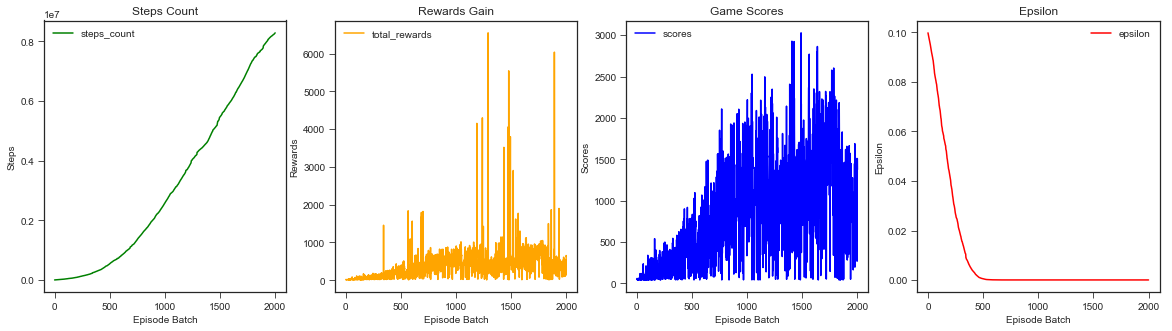

In [14]:
plt.style.use(['seaborn-ticks'])
fig, ax = plt.subplots(1, 4, figsize = (20, 5))
x = df.index
y1 = df.steps_count
y2 = df.total_rewards
y3 = df.scores
y4 = df.epsilon

ax[0].plot(x, y1, linestyle='-', color='green')
ax[0].set_title('Steps Count')
ax[0].set_xlabel('Episode Batch')
ax[0].set_ylabel('Steps')
ax[0].legend()

ax[1].plot(x, y2, linestyle='-', color='orange')
ax[1].set_title('Rewards Gain')
ax[1].set_xlabel('Episode Batch')
ax[1].set_ylabel('Rewards')
ax[1].legend()

ax[2].plot(x, y3, linestyle='-', color='blue')
ax[2].set_title('Game Scores')
ax[2].set_xlabel('Episode Batch')
ax[2].set_ylabel('Scores')
ax[2].legend()

ax[3].plot(x, y4, linestyle='-', color='red')
ax[3].set_title('Epsilon')
ax[3].set_xlabel('Episode Batch')
ax[3].set_ylabel('Epsilon')
ax[3].legend()

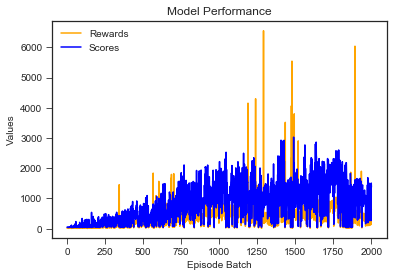

In [15]:
plt.plot(x, y2, label="Rewards", linestyle='-', color='orange')
plt.plot(x, y3, label="Scores", linestyle='-', color='blue')
plt.title('Model Performance')
plt.xlabel('Episode Batch')
plt.ylabel('Values')
plt.legend()

### Result Visualization [Computed Batch Average]

In [16]:
avg_df = df.groupby(np.arange(len(df))//100).mean()

In [17]:
avg_df

,steps_count,total_rewards,scores,epsilon
0,14674.83,25.900,69.74,0.086717
1,58901.19,42.808,116.49,0.056085
2,130783.15,74.355,189.68,0.027931
3,243940.13,130.645,268.93,0.009599
4,420784.63,212.408,449.98,0.001914
5,670939.92,244.358,471.41,0.000253
6,964199.93,335.701,649.99,0.000110
7,1356413.21,435.177,913.98,0.000100
8,1813754.10,438.880,920.11,0.000100
9,2305626.04,523.506,1136.14,0.000100


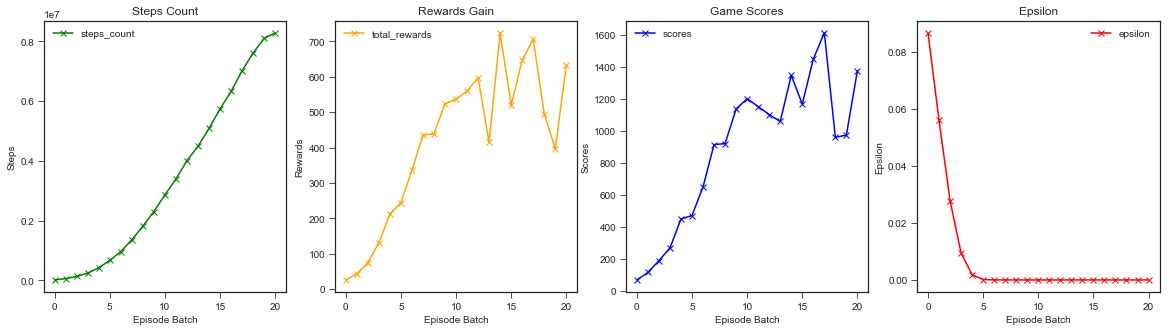

In [18]:
plt.style.use(['seaborn-ticks'])
fig, ax = plt.subplots(1, 4, figsize = (20, 5))
x = avg_df.index
y1 = avg_df.steps_count
y2 = avg_df.total_rewards
y3 = avg_df.scores
y4 = avg_df.epsilon

ax[0].plot(x, y1, linestyle='-', marker='x', color='green')
ax[0].set_title('Steps Count')
ax[0].set_xlabel('Episode Batch')
ax[0].set_ylabel('Steps')
ax[0].legend()

ax[1].plot(x, y2, linestyle='-', marker='x', color='orange')
ax[1].set_title('Rewards Gain')
ax[1].set_xlabel('Episode Batch')
ax[1].set_ylabel('Rewards')
ax[1].legend()

ax[2].plot(x, y3, linestyle='-', marker='x', color='blue')
ax[2].set_title('Game Scores')
ax[2].set_xlabel('Episode Batch')
ax[2].set_ylabel('Scores')
ax[2].legend()

ax[3].plot(x, y4, linestyle='-', marker='x', color='red')
ax[3].set_title('Epsilon')
ax[3].set_xlabel('Episode Batch')
ax[3].set_ylabel('Epsilon')
ax[3].legend()

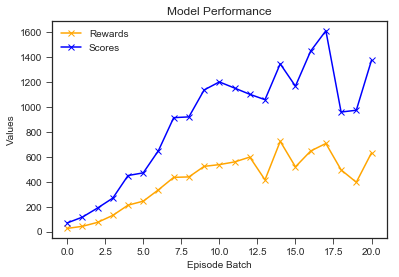

In [19]:
plt.plot(x, y2, label="Rewards", linestyle='-', marker='x', color='orange')
plt.plot(x, y3, label="Scores", linestyle='-', marker='x', color='blue')
plt.title('Model Performance')
plt.xlabel('Episode Batch')
plt.ylabel('Values')
plt.legend()

In [20]:
class LogParser:
    def __init__(self, csv, nrows):
        self.df = pd.read_csv(csv, nrows=nrows, names=['time','episode', 'steps_count', 'total_rewards', 'scores', 'epsilon'])
    
    @property
    def score(self):
        return self.df['scores'].values
    
    @property
    def reward(self):
        return self.df['total_rewards'].values
    
    def _avg(self, vals, epoch):
        num = vals.shape[0]
        vals = vals.reshape(num // epoch, -1)
        return np.average(vals, axis=1)
    
    def _max(self, vals, epoch):
        num = vals.shape[0]
        vals = vals.reshape(num // epoch, -1)
        return np.max(vals, axis=1)
    
    def max_score(self, epoch):
        return self._max(self.score, epoch)
    
    def avg_score(self, epoch):
        return self._avg(self.score, epoch)
    
    def avg_reward(self, epoch):
        return self._avg(self.reward, epoch)


### Average and Max Score during Training

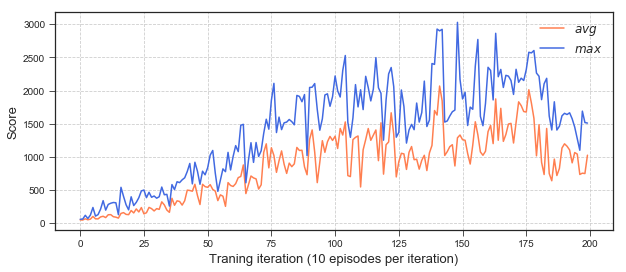

In [21]:
nrows = 2e3
dqn = LogParser("dino-log.csv", nrows)

plt.figure(figsize=(10, 4))
plt.plot(dqn.avg_score(10), label=r'$avg$', color='coral')
plt.plot(dqn.max_score(10), label=r'$max$', color='royalblue')
# plt.plot(dqn_bn.avg_score(10), label=r'$DQN\,\,with\,\,BN$')
plt.xlabel("Traning iteration (10 episodes per iteration)", fontsize=13)
plt.ylabel("Score", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')
# plt.savefig("score-dqn.png", dpi=100)


### Average Reward during Training

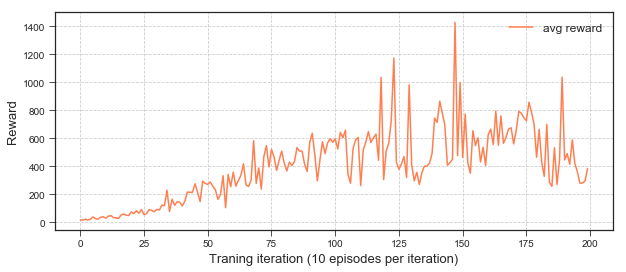

In [30]:
plt.figure(figsize=(10, 4))
plt.plot(dqn.avg_reward(10), label='avg reward', color='coral')
plt.xlabel("Traning iteration (10 episodes per iteration)", fontsize=13)
plt.ylabel("Reward", fontsize=13)
plt.legend(fontsize='large')
plt.grid(linestyle='--')
# plt.savefig("reward-dqn.png", dpi=100)